## Working in vscode for the first time? 

Make sure you switch your kernel so you have all the needed packages!!

On the top right of VSCode, click the Python 3.12.xx or whatever verison you have, choose select another kernel, and then switch to your installed Conda environment.

Call lukas if its not working

Also make sure you download the CSV files, found here:
https://www.kaggle.com/datasets/doshij/nfl-play-by-play-20092018?resource=download (use v5)
https://www.kaggle.com/datasets/ttalbitt/american-football-team-stats-1998-2019



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1 - base

In [21]:
# import dataset
all_plays = pd.read_csv('Play-By-Play 2009-2018.csv')
# columns to take from dataset
selected_cols = ['fourth_down_converted', 'home_team', 'away_team', 'posteam', 'defteam', 'yardline_100',
                     'game_date', 'quarter_seconds_remaining', 'qtr', 'down', 'ydstogo', 'play_type', 'posteam_timeouts_remaining', 
                     'defteam_timeouts_remaining', 'posteam_score', 'defteam_score', 'score_differential', 'fg_prob', 'td_prob', 'ep', 'wp',
                     'def_wp', 'penalty_yards', 'penalty_type']
# take the correct columns
all_plays_with_selected_columns = all_plays[selected_cols]
all_plays_with_selected_columns
all_plays_with_selected_columns.shape

/var/folders/j1/8vpmm1xj3zlfds2w6fpr8x6m0000gp/T/ipykernel_76036/4056370830.py:2: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  all_plays = pd.read_csv('Play-By-Play 2009-2018.csv')


(449371, 24)

In [22]:
# drop any NaN rows
noNaNs = all_plays_with_selected_columns.dropna(how='all')
na_counts = noNaNs.isna().sum()

# Filter rows with NaNs in any column except 'penalty_yards' and 'penalty_type'
cols_to_check = noNaNs.columns.difference(['penalty_yards', 'penalty_type'])

# Drop these rows as they will not be useful
no_more_nas_but_penalties = noNaNs.dropna(subset=cols_to_check).copy()

# Fill NaNs in penalty-related columns with appropriate values
no_more_nas_but_penalties['penalty_yards'] = no_more_nas_but_penalties['penalty_yards'].fillna(0)
no_more_nas_but_penalties['penalty_type'] = no_more_nas_but_penalties['penalty_type'].fillna('No Penalty')

# Check for remaining NaNs
no_more_nas_but_penalties.isna().sum()

# Drop duplicate rows
no_more_nas_but_penalties = no_more_nas_but_penalties.drop_duplicates()

# Final cleaned dataset
no_more_nas = no_more_nas_but_penalties.copy()

In [23]:
# take only fourth down plays
only_fourth_downs = no_more_nas[no_more_nas['down'] == 4.0]
only_fourth_downs = only_fourth_downs.drop(columns ='down')
only_fourth_downs

,fourth_down_converted,home_team,away_team,posteam,defteam,yardline_100,game_date,quarter_seconds_remaining,qtr,ydstogo,...,posteam_score,defteam_score,score_differential,fg_prob,td_prob,ep,wp,def_wp,penalty_yards,penalty_type
4,0.0,PIT,TEN,PIT,TEN,56.0,2009-09-10,807.0,1,8,...,0.0,0.0,0.0,0.244603,0.208111,-0.699436,0.461217,0.538783,0.0,No Penalty
8,0.0,PIT,TEN,TEN,PIT,96.0,2009-09-10,694.0,1,8,...,0.0,0.0,0.0,0.023641,0.135991,-3.393288,0.382456,0.617544,0.0,No Penalty
14,0.0,PIT,TEN,PIT,TEN,41.0,2009-09-10,505.0,1,21,...,0.0,0.0,0.0,0.501696,0.150286,0.757343,0.514075,0.485925,0.0,No Penalty
20,0.0,PIT,TEN,TEN,PIT,19.0,2009-09-10,408.0,1,7,...,0.0,0.0,0.0,0.895016,0.028760,2.487035,0.569509,0.430491,0.0,No Penalty
24,0.0,PIT,TEN,PIT,TEN,79.0,2009-09-10,302.0,1,16,...,0.0,0.0,0.0,0.077646,0.157581,-2.604561,0.413994,0.586006,0.0,No Penalty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449306,0.0,CAR,NO,NO,CAR,70.0,2018-12-17,583.0,3,4,...,6.0,7.0,-1.0,0.105783,0.224952,-1.637095,0.409143,0.590857,15.0,Roughing the Kicker
449310,0.0,CAR,NO,NO,CAR,53.0,2018-12-17,463.0,3,8,...,6.0,7.0,-1.0,0.283359,0.210972,-0.306871,0.451116,0.548884,5.0,Player Out of Bounds on Kick
449341,0.0,CAR,NO,CAR,NO,58.0,2018-12-17,536.0,4,16,...,7.0,12.0,-5.0,0.211915,0.160936,-0.597099,0.249497,0.750503,0.0,No Penalty
449355,1.0,CAR,NO,NO,CAR,14.0,2018-12-17,150.0,4,1,...,12.0,7.0,5.0,0.548503,0.135899,2.199064,0.906124,0.093876,0.0,No Penalty


In [24]:
# Ensure game_date is in datetime format
only_fourth_downs['game_date'] = pd.to_datetime(only_fourth_downs['game_date'])

# Extract the year and create a new column
only_fourth_downs['year'] = only_fourth_downs['game_date'].dt.year

# drop game date column
only_fourth_downs = only_fourth_downs.drop(columns ='game_date')
only_fourth_downs

,fourth_down_converted,home_team,away_team,posteam,defteam,yardline_100,quarter_seconds_remaining,qtr,ydstogo,play_type,...,defteam_score,score_differential,fg_prob,td_prob,ep,wp,def_wp,penalty_yards,penalty_type,year
4,0.0,PIT,TEN,PIT,TEN,56.0,807.0,1,8,punt,...,0.0,0.0,0.244603,0.208111,-0.699436,0.461217,0.538783,0.0,No Penalty,2009
8,0.0,PIT,TEN,TEN,PIT,96.0,694.0,1,8,punt,...,0.0,0.0,0.023641,0.135991,-3.393288,0.382456,0.617544,0.0,No Penalty,2009
14,0.0,PIT,TEN,PIT,TEN,41.0,505.0,1,21,punt,...,0.0,0.0,0.501696,0.150286,0.757343,0.514075,0.485925,0.0,No Penalty,2009
20,0.0,PIT,TEN,TEN,PIT,19.0,408.0,1,7,field_goal,...,0.0,0.0,0.895016,0.028760,2.487035,0.569509,0.430491,0.0,No Penalty,2009
24,0.0,PIT,TEN,PIT,TEN,79.0,302.0,1,16,punt,...,0.0,0.0,0.077646,0.157581,-2.604561,0.413994,0.586006,0.0,No Penalty,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449306,0.0,CAR,NO,NO,CAR,70.0,583.0,3,4,no_play,...,7.0,-1.0,0.105783,0.224952,-1.637095,0.409143,0.590857,15.0,Roughing the Kicker,2018
449310,0.0,CAR,NO,NO,CAR,53.0,463.0,3,8,punt,...,7.0,-1.0,0.283359,0.210972,-0.306871,0.451116,0.548884,5.0,Player Out of Bounds on Kick,2018
449341,0.0,CAR,NO,CAR,NO,58.0,536.0,4,16,punt,...,12.0,-5.0,0.211915,0.160936,-0.597099,0.249497,0.750503,0.0,No Penalty,2018
449355,1.0,CAR,NO,NO,CAR,14.0,150.0,4,1,run,...,7.0,5.0,0.548503,0.135899,2.199064,0.906124,0.093876,0.0,No Penalty,2018


In [25]:
# convert team codes for proper mapping
abbreviation_to_team_code = {
    'NE': 'nwe', 'BUF': 'buf', 'NYJ': 'nyj', 'MIA': 'mia',  # AFC East
    'BAL': 'rav', 'PIT': 'pit', 'CLE': 'cle', 'CIN': 'cin',  # AFC North
    'HOU': 'htx', 'TEN': 'oti', 'IND': 'clt', 'JAX': 'jax',  # AFC South
    'KC': 'kan', 'DEN': 'den', 'OAK': 'rai', 'SD': 'sdg',  # AFC West (pre-move)
    'LAC': 'sdg', 'LV': 'rai',  # Post-relocation names
    'PHI': 'phi', 'DAL': 'dal', 'NYG': 'nyg', 'WAS': 'was',  # NFC East
    'GB': 'gnb', 'MIN': 'min', 'CHI': 'chi', 'DET': 'det',  # NFC North
    'NO': 'nor', 'ATL': 'atl', 'TB': 'tam', 'CAR': 'car',  # NFC South
    'SF': 'sfo', 'SEA': 'sea', 'STL': 'ram', 'LA': 'ram', 'ARI': 'crd'  # NFC West
}

# Map team abbreviations to standard team codes
only_fourth_downs['posteam_code'] = only_fourth_downs['posteam'].map(abbreviation_to_team_code)
only_fourth_downs['defteam_code'] = only_fourth_downs['defteam'].map(abbreviation_to_team_code)

# Concatenate with the year to create final team codes
only_fourth_downs['posteam_code'] = only_fourth_downs['posteam_code'] + only_fourth_downs['year'].astype(str)
only_fourth_downs['defteam_code'] = only_fourth_downs['defteam_code'] + only_fourth_downs['year'].astype(str)

In [26]:
# get rid of home and away teams, replacing with if posteam is at home

# Create a new column indicating whether posteam is playing at home (1) or away (0)
only_fourth_downs['is_home'] = (only_fourth_downs['posteam'] == only_fourth_downs['home_team']).astype(int)

# Drop the now-unnecessary columns
only_fourth_downs = only_fourth_downs.drop(columns=['home_team', 'away_team'])

In [27]:
# get rid of punts
only_fourth_downs_no_punts = only_fourth_downs[only_fourth_downs['play_type'] != 'punt'].copy()

# 2 - team dataset

In [28]:
team_stats = pd.read_csv('Team Stats 98-2019.csv')
selected_cols_2 = ['team_code', 'wins', 'losses', 'yards/play', 'pen yards', 'score percentage', 'turnover percentage', 'opp PF', 'opp yards']
team_stats = team_stats[selected_cols_2]

# 3 - merge

In [29]:
# Merge offensive team stats (posteam)
only_fourth_downs_no_punts = only_fourth_downs_no_punts.merge(
    team_stats[['team_code', 'wins', 'losses', 'yards/play', 'score percentage', 'turnover percentage']], 
    left_on='posteam_code', right_on='team_code', how='left'
)

# Rename columns for offense
only_fourth_downs_no_punts.rename(columns={
    'wins': 'posteam_wins',
    'losses': 'posteam_losses',
    'yards/play': 'posteam_yards_per_play',
    'score percentage': 'posteam_score_pct',
    'turnover percentage': 'posteam_turnover_pct'
}, inplace=True)

# Drop redundant 'team_code' from first merge
only_fourth_downs_no_punts.drop(columns=['team_code'], inplace=True)

# Merge defensive team stats (defteam)
only_fourth_downs_no_punts = only_fourth_downs_no_punts.merge(
    team_stats[['team_code', 'pen yards', 'opp PF', 'opp yards']], 
    left_on='defteam_code', right_on='team_code', how='left'
)

# Rename columns for defense
only_fourth_downs_no_punts.rename(columns={
    'pen yards': 'defteam_penalty_yards',
    'opp PF': 'defteam_opp_points_for',
    'opp yards': 'defteam_opp_yards'
}, inplace=True)

# Drop redundant 'team_code' from second merge
only_fourth_downs_no_punts.drop(columns=['team_code'], inplace=True)
only_fourth_downs_no_punts.columns

Index(['fourth_down_converted', 'posteam', 'defteam', 'yardline_100',
       'quarter_seconds_remaining', 'qtr', 'ydstogo', 'play_type',
       'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
       'posteam_score', 'defteam_score', 'score_differential', 'fg_prob',
       'td_prob', 'ep', 'wp', 'def_wp', 'penalty_yards', 'penalty_type',
       'year', 'posteam_code', 'defteam_code', 'is_home', 'posteam_wins',
       'posteam_losses', 'posteam_yards_per_play', 'posteam_score_pct',
       'posteam_turnover_pct', 'defteam_penalty_yards',
       'defteam_opp_points_for', 'defteam_opp_yards'],
      dtype='object')

In [30]:
base = (only_fourth_downs_no_punts.drop(columns=['posteam_code', 'defteam_code'])).copy()
base = base.drop(columns = ['posteam', 'defteam'])
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15521 entries, 0 to 15520
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fourth_down_converted       15521 non-null  float64
 1   yardline_100                15521 non-null  float64
 2   quarter_seconds_remaining   15521 non-null  float64
 3   qtr                         15521 non-null  int64  
 4   ydstogo                     15521 non-null  int64  
 5   play_type                   15521 non-null  object 
 6   posteam_timeouts_remaining  15521 non-null  float64
 7   defteam_timeouts_remaining  15521 non-null  float64
 8   posteam_score               15521 non-null  float64
 9   defteam_score               15521 non-null  float64
 10  score_differential          15521 non-null  float64
 11  fg_prob                     15521 non-null  float64
 12  td_prob                     15521 non-null  float64
 13  ep                          155

In [31]:
from sklearn.preprocessing import LabelEncoder
# convert non-numerical values

## play type
new_base = pd.get_dummies(base, columns =['play_type'], prefix = "play:")

## penalty type
new_base['penalty_binary'] = np.where(new_base['penalty_type'] == 'No Penalty', 0, 1)
new_base_clean = new_base.drop(columns=['penalty_type'])


###### why are there na - is it specific teams or just random??
new_base_clean.dropna(inplace=True)
new_base_clean.isna().sum()

fourth_down_converted         0
yardline_100                  0
quarter_seconds_remaining     0
qtr                           0
ydstogo                       0
posteam_timeouts_remaining    0
defteam_timeouts_remaining    0
posteam_score                 0
defteam_score                 0
score_differential            0
fg_prob                       0
td_prob                       0
ep                            0
wp                            0
def_wp                        0
penalty_yards                 0
year                          0
is_home                       0
posteam_wins                  0
posteam_losses                0
posteam_yards_per_play        0
posteam_score_pct             0
posteam_turnover_pct          0
defteam_penalty_yards         0
defteam_opp_points_for        0
defteam_opp_yards             0
play:_field_goal              0
play:_no_play                 0
play:_pass                    0
play:_qb_kneel                0
play:_run                     0
penalty_

## Scaling Data

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()

df = new_base_clean.copy()

scaler = StandardScaler()

columns_to_scale = [
    "yardline_100", "quarter_seconds_remaining", "qtr", "ydstogo",
    "posteam_timeouts_remaining", "defteam_timeouts_remaining", "posteam_score", "defteam_score",
    "score_differential", "posteam_wins", "posteam_losses", 
    "posteam_yards_per_play", "posteam_score_pct", "posteam_turnover_pct", 
    "defteam_penalty_yards", "defteam_opp_points_for", "defteam_opp_yards", 
]

df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


df.describe()



,fourth_down_converted,yardline_100,quarter_seconds_remaining,qtr,ydstogo,posteam_timeouts_remaining,defteam_timeouts_remaining,posteam_score,defteam_score,score_differential,...,is_home,posteam_wins,posteam_losses,posteam_yards_per_play,posteam_score_pct,posteam_turnover_pct,defteam_penalty_yards,defteam_opp_points_for,defteam_opp_yards,penalty_binary
count,14804.000000,14804.000000,14804.000000,14804.000000,14804.000000,14804.000000,14804.000000,14804.000000,14804.000000,14804.000000,...,14804.000000,14804.000000,14804.000000,14804.000000,14804.000000,14804.000000,14804.000000,14804.000000,14804.000000,14804.000000
mean,0.148203,27.508376,364.450689,2.783775,6.334031,2.296879,2.399689,10.916914,12.637665,-1.720751,...,0.498581,8.015536,7.939003,5.402121,34.184207,12.173102,878.764996,358.332072,5521.551337,0.119427
std,0.355313,19.406404,260.976310,1.140500,5.024934,0.922382,0.880100,9.692279,10.611928,11.321634,...,0.500015,3.054709,3.058902,0.480263,6.469808,3.187687,141.644344,55.781273,486.834903,0.324301
min,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-59.000000,...,0.000000,0.000000,1.000000,4.100000,18.900000,4.900000,415.000000,227.000000,4037.000000,0.000000
25%,0.000000,13.000000,120.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,-7.000000,...,0.000000,6.000000,6.000000,5.100000,29.700000,9.800000,787.000000,318.000000,5198.000000,0.000000
50%,0.000000,25.000000,330.000000,3.000000,5.000000,3.000000,3.000000,10.000000,10.000000,0.000000,...,0.000000,8.000000,8.000000,5.400000,34.200000,11.800000,874.000000,353.000000,5542.000000,0.000000
75%,0.000000,36.000000,580.000000,4.000000,9.000000,3.000000,3.000000,17.000000,20.000000,4.000000,...,1.000000,10.000000,10.000000,5.800000,38.500000,14.700000,960.000000,399.000000,5857.000000,0.000000
max,1.000000,99.000000,900.000000,5.000000,43.000000,3.000000,3.000000,59.000000,59.000000,59.000000,...,1.000000,15.000000,16.000000,6.800000,52.600000,21.000000,1358.000000,494.000000,7042.000000,1.000000


## Need to scale features - as you can see, regression below shows nothing
## Also - do we want to eliminate some features?

# 4 - simple regression

/Applications/anaconda3/envs/TimuskML/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


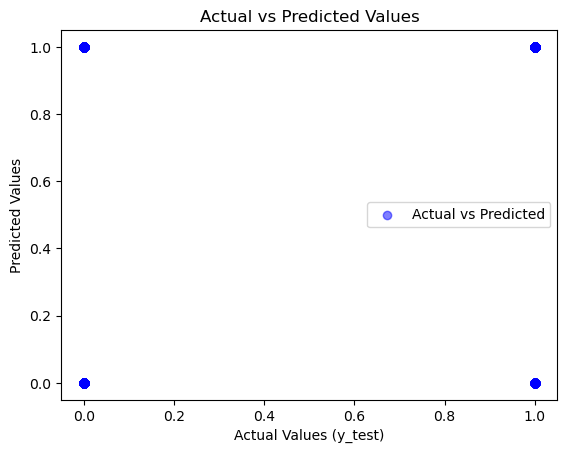

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

y = df_scaled['fourth_down_converted']
X = df_scaled.drop(columns = ['fourth_down_converted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=144)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

plt.scatter(y_test, predictions, color='blue', alpha=0.5, label="Actual vs Predicted")

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Actual vs Predicted Values")
plt.show()